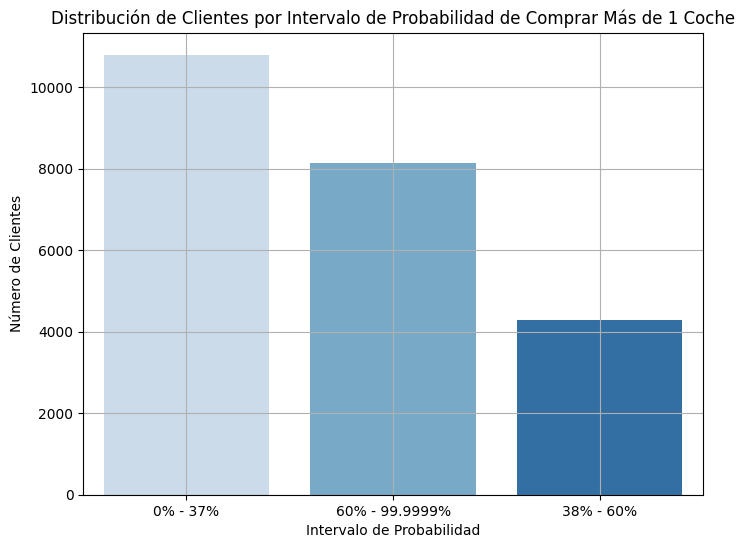

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos del CSV
df = pd.read_csv('cars_test2_pred_mod_con_probabilidad.csv')

# 2. Crear una columna que clasifique las probabilidades en intervalos de 0´30, 0´60 y 0´99
def clasificar_intervalo(probabilidad):
    '''
    if probabilidad <= 0.30:
        return '0% - 30%'
    elif 0.30 < probabilidad <= 0.60:
        return '31% - 60%'
    else:
        return '61% - 99.9999%'
    '''
    if probabilidad <= 0.37:
        return '0% - 37%'
    elif 0.37 < probabilidad <= 0.60:
        return '38% - 60%'
    else:
        return '60% - 99.9999%'

df['Intervalo_Probabilidad'] = df['Probabilidad_Mas_1_coche'].apply(clasificar_intervalo)

# 3. Graficar la distribución de clientes en cada intervalo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Intervalo_Probabilidad', palette='Blues')

# 4. Personalizar el gráfico
plt.title('Distribución de Clientes por Intervalo de Probabilidad de Comprar Más de 1 Coche')
plt.xlabel('Intervalo de Probabilidad')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()


In [36]:

# 3. Comparar la forma de pago más utilizada en cada intervalo
formas_pago_intervalos = df.groupby('Intervalo_Probabilidad')['FORMA_PAGO'].agg(lambda x: x.mode()[0])

# 4. Mostrar el resultado
print("Forma de pago más utilizada en cada intervalo de probabilidad:")
print(formas_pago_intervalos)


Forma de pago más utilizada en cada intervalo de probabilidad:
Intervalo_Probabilidad
0% - 37%          Contado
38% - 60%         Contado
60% - 99.9999%    Contado
Name: FORMA_PAGO, dtype: object


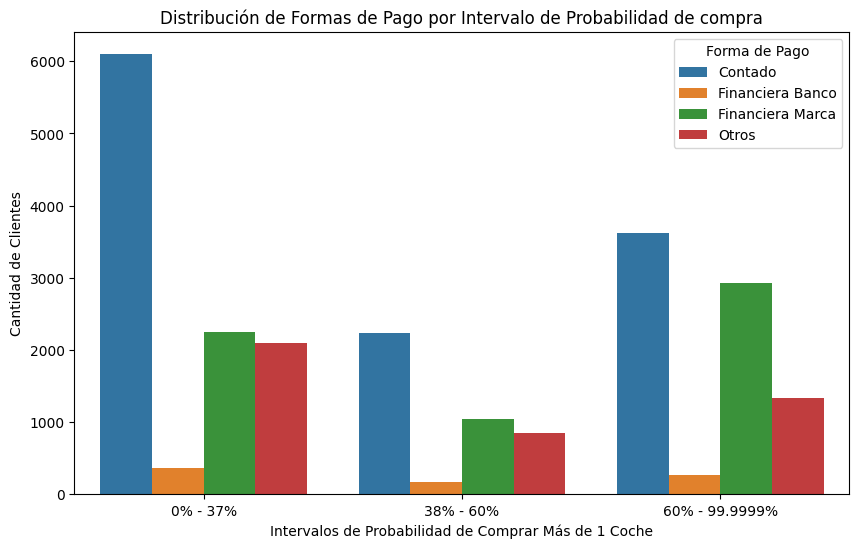

In [37]:
# 3. Contar las formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'FORMA_PAGO']).size().reset_index(name='counts')

# 4. Graficar las formas de pago en cada intervalo de probabilidad
plt.figure(figsize=(10, 6))
sns.barplot(x='Intervalo_Probabilidad', y='counts', hue='FORMA_PAGO', data=formas_pago_por_intervalo)
plt.title('Distribución de Formas de Pago por Intervalo de Probabilidad de compra')
plt.xlabel('Intervalos de Probabilidad de Comprar Más de 1 Coche')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Forma de Pago')
plt.show()

No nos aporta nada porque es similar en los 3 intervalos

Podemos observar como la gente con mas probabilidad de comprar un coche, suelen utilizar el metodo de financiado por marca

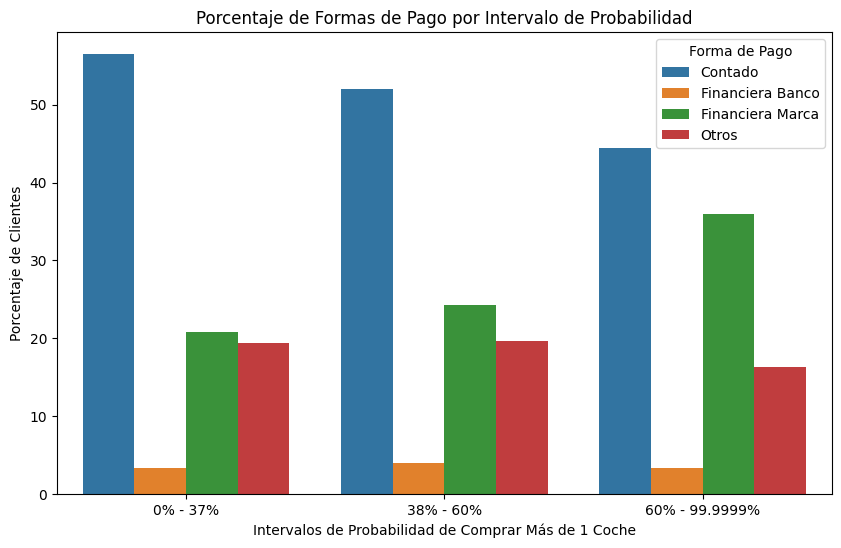

In [38]:
# 3. Contar las formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'FORMA_PAGO']).size().reset_index(name='counts')

# 4. Obtener el total de clientes por intervalo para calcular porcentajes
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')

# 5. Unir ambas tablas para calcular el porcentaje
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 6. Graficar las formas de pago en cada intervalo de probabilidad con porcentajes
plt.figure(figsize=(10, 6))
sns.barplot(x='Intervalo_Probabilidad', y='percentage', hue='FORMA_PAGO', data=formas_pago_por_intervalo)
plt.title('Porcentaje de Formas de Pago por Intervalo de Probabilidad')
plt.xlabel('Intervalos de Probabilidad de Comprar Más de 1 Coche')
plt.ylabel('Porcentaje de Clientes')
plt.legend(title='Forma de Pago')
plt.show()

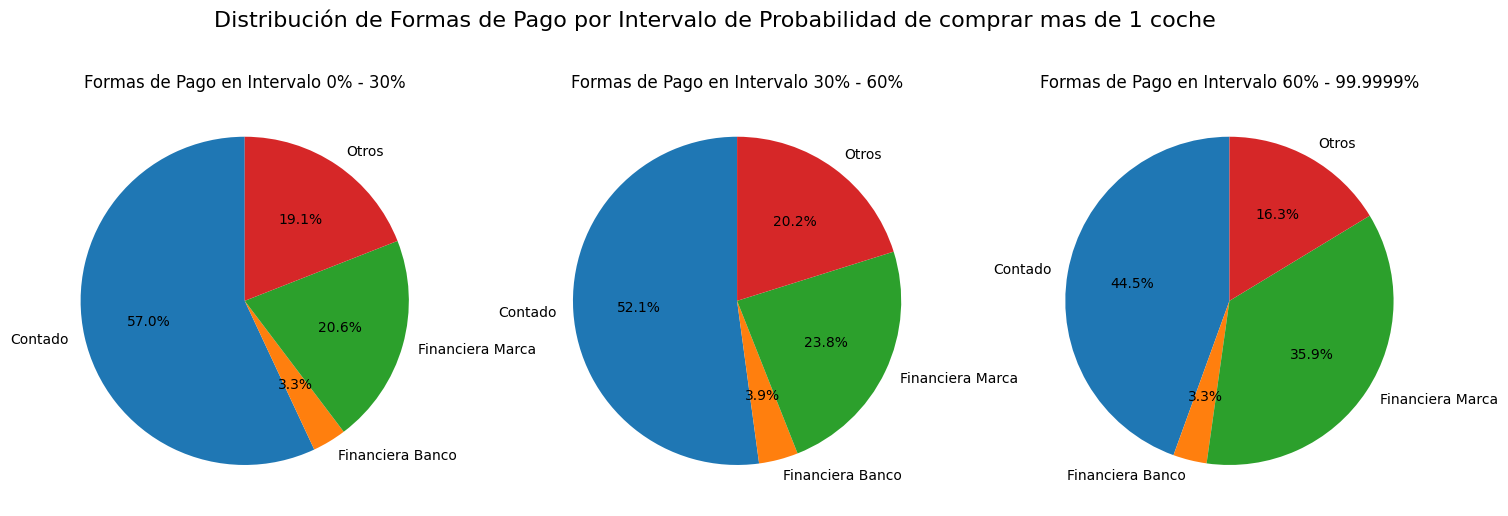

In [13]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'FORMA_PAGO']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 30%', '30% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['FORMA_PAGO'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Pago en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Pago por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()

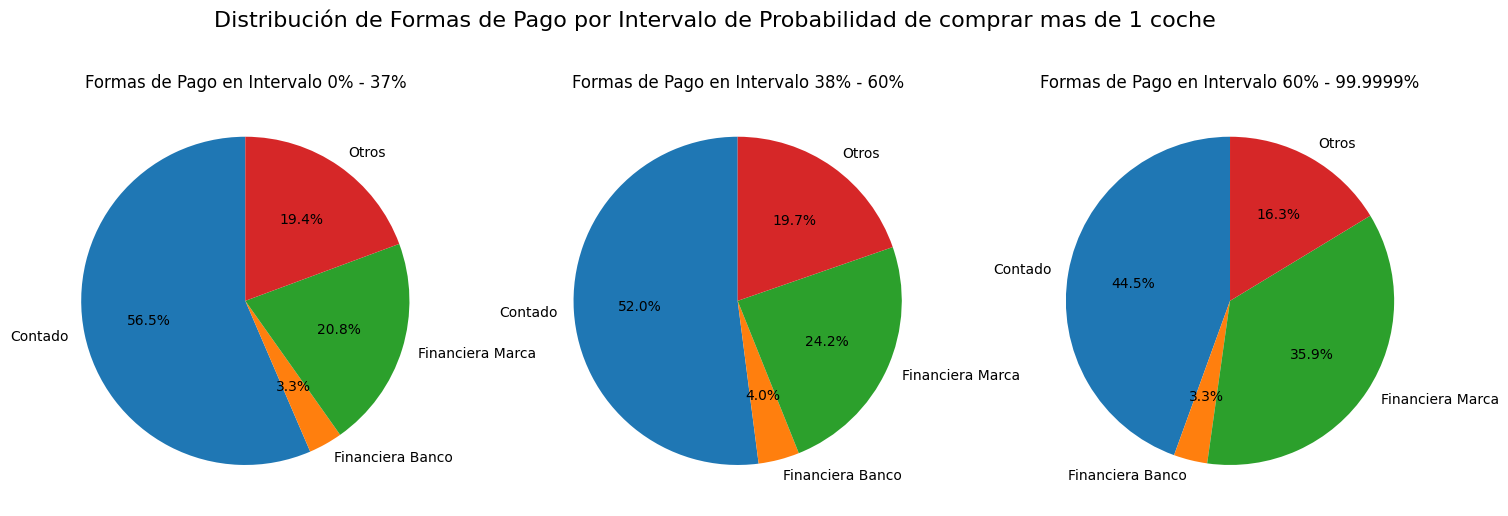

In [40]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'FORMA_PAGO']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['FORMA_PAGO'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Pago en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Pago por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()

Podemos decir que la gente mas probable para comprar mas de 1 coche financia mas con marca el pago y paga menos al contado que el resto 

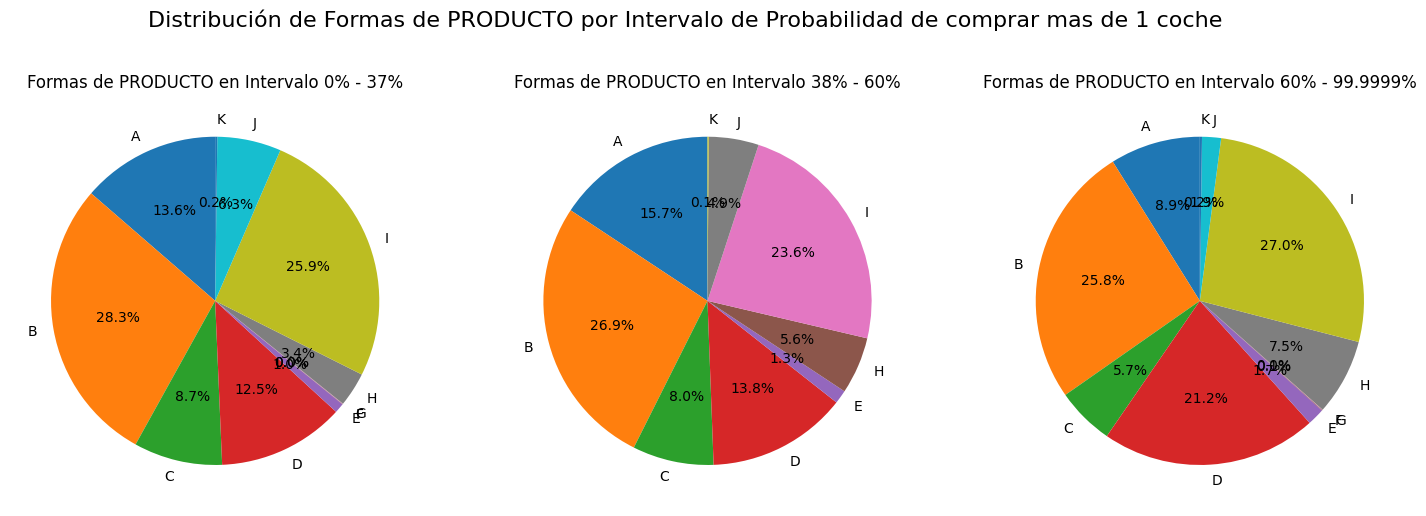

In [41]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'PRODUCTO']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['PRODUCTO'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de PRODUCTO en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de PRODUCTO por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


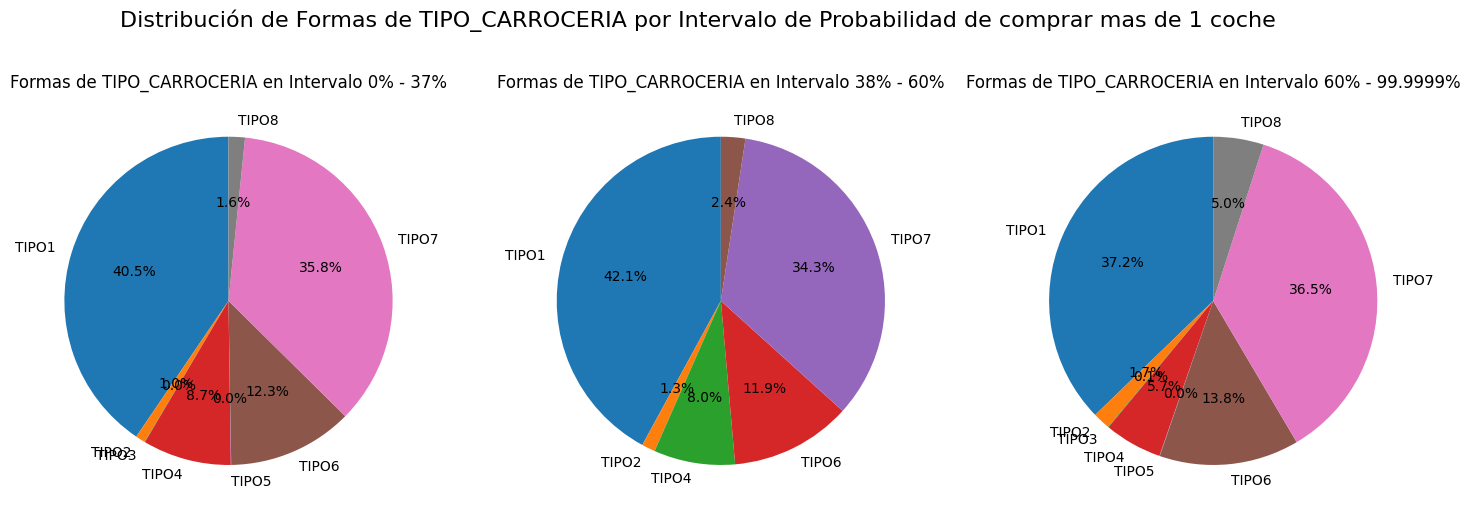

In [63]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'TIPO_CARROCERIA']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['TIPO_CARROCERIA'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de TIPO_CARROCERIA en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de TIPO_CARROCERIA por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


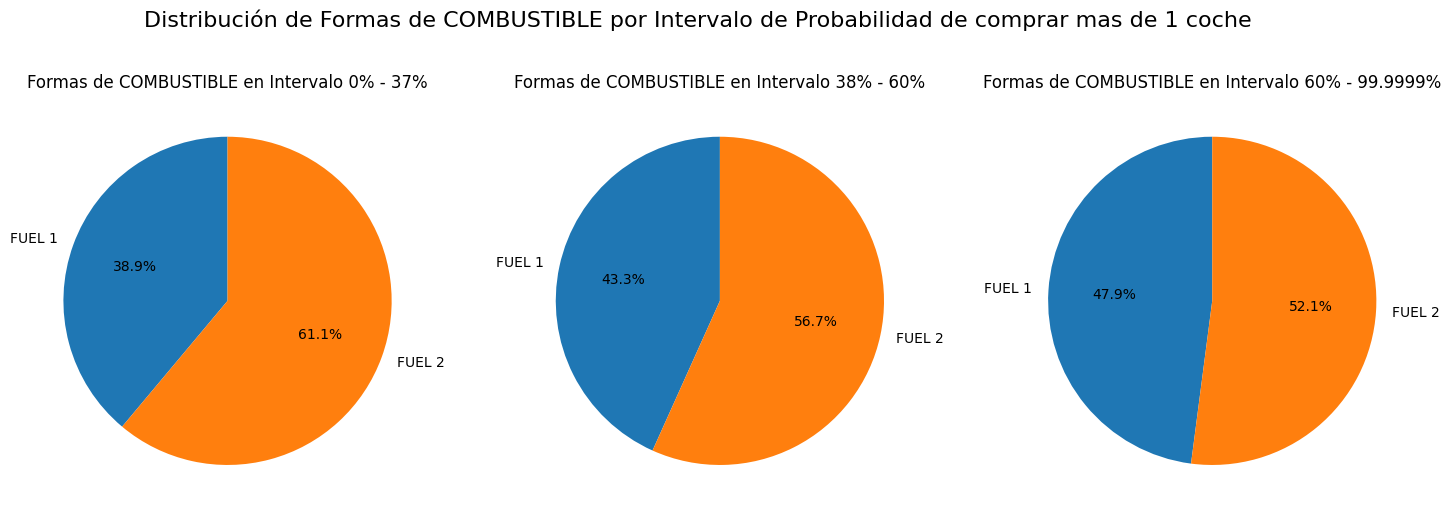

In [62]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'COMBUSTIBLE']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['COMBUSTIBLE'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de COMBUSTIBLE en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de COMBUSTIBLE por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


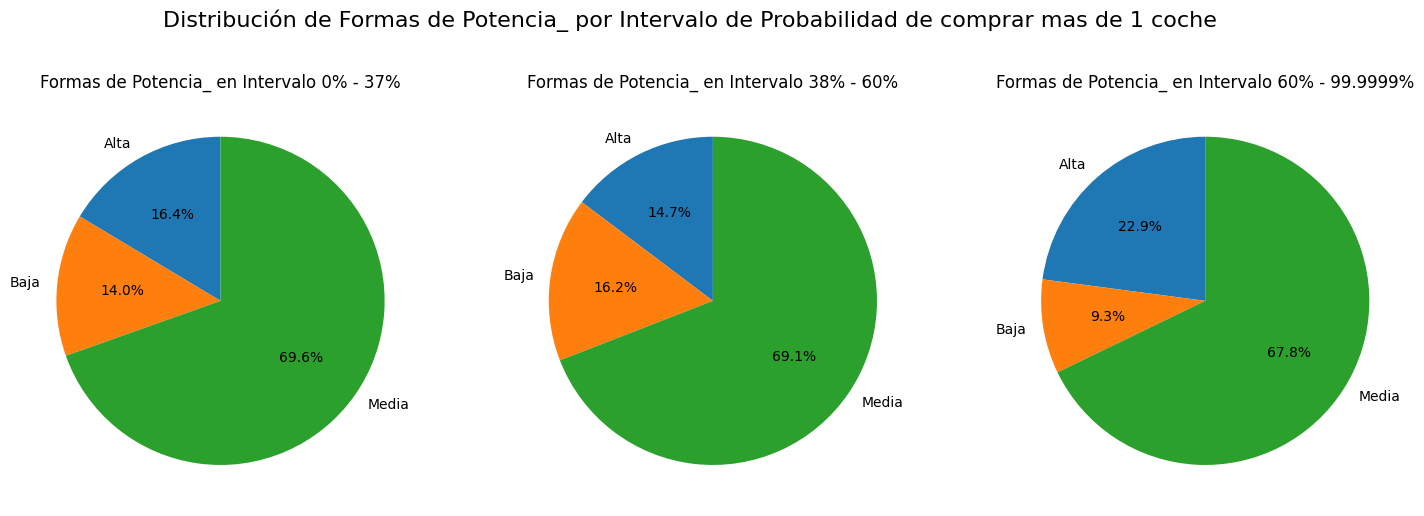

In [60]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Potencia_']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Potencia_'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Potencia_ en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Potencia_ por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


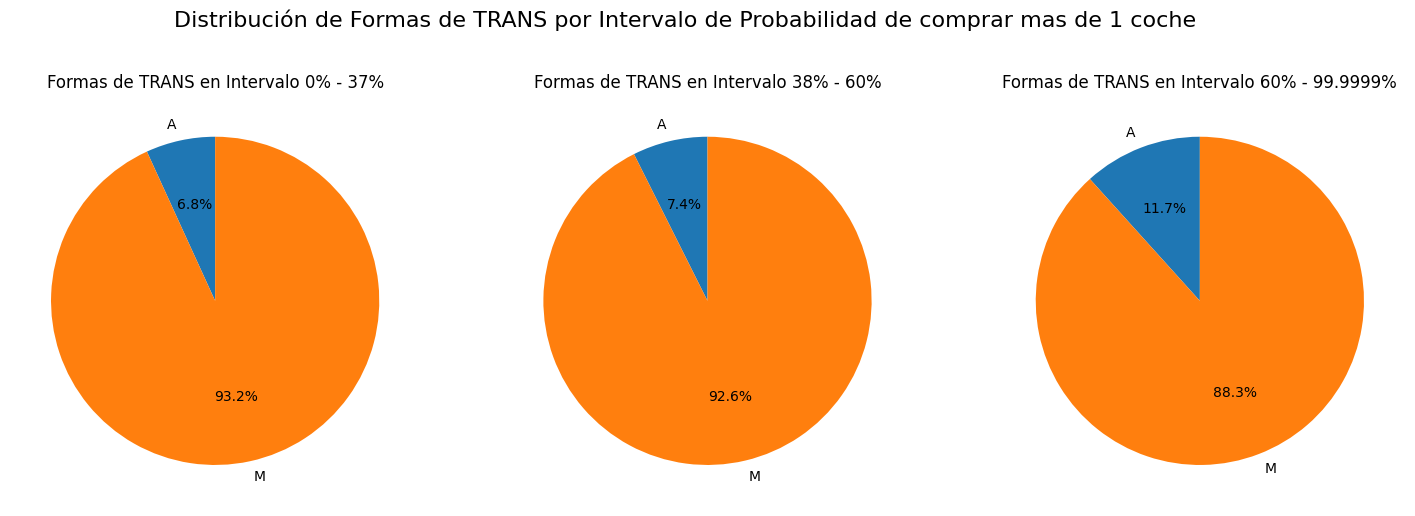

In [61]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'TRANS']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['TRANS'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de TRANS en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de TRANS por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


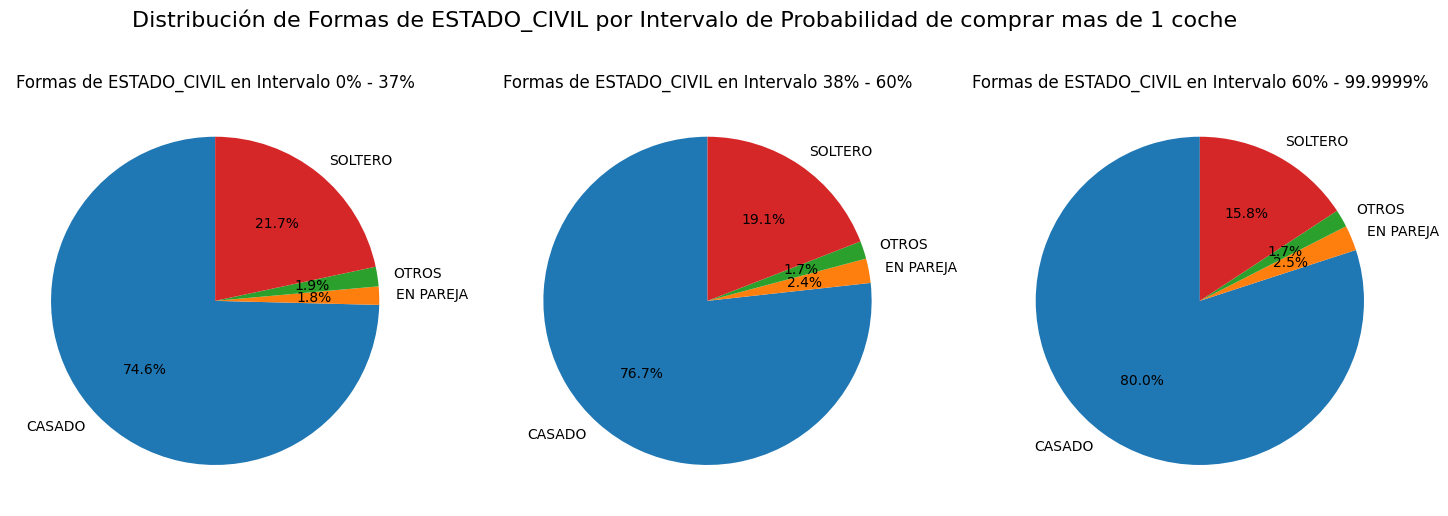

In [58]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'ESTADO_CIVIL']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['ESTADO_CIVIL'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de ESTADO_CIVIL en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de ESTADO_CIVIL por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


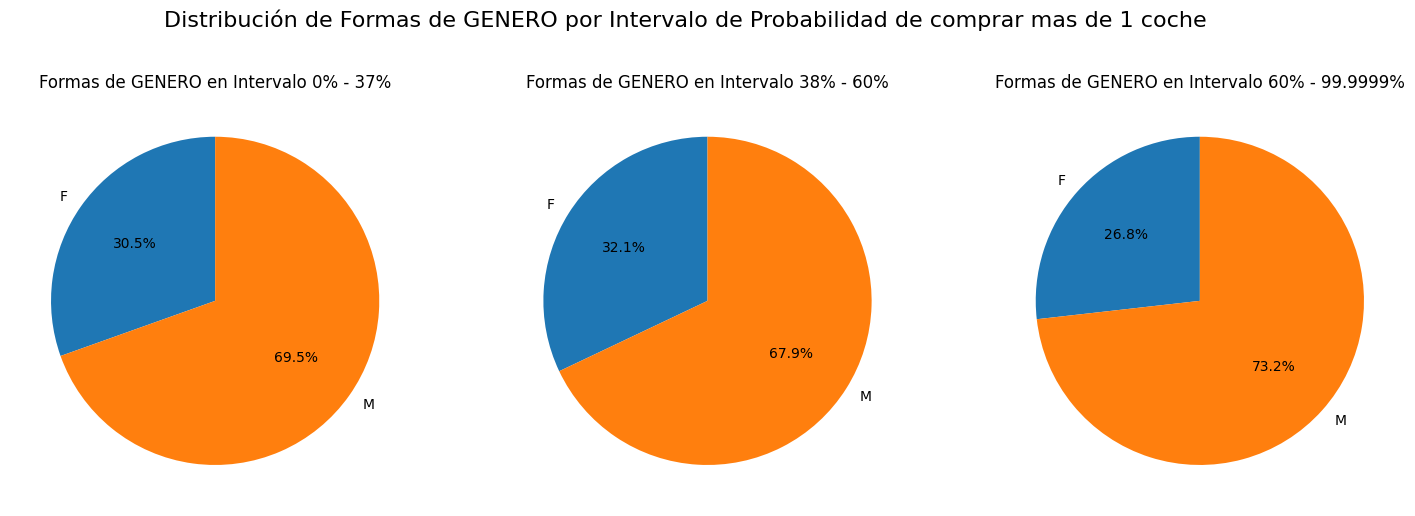

In [59]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'GENERO']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['GENERO'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de GENERO en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de GENERO por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


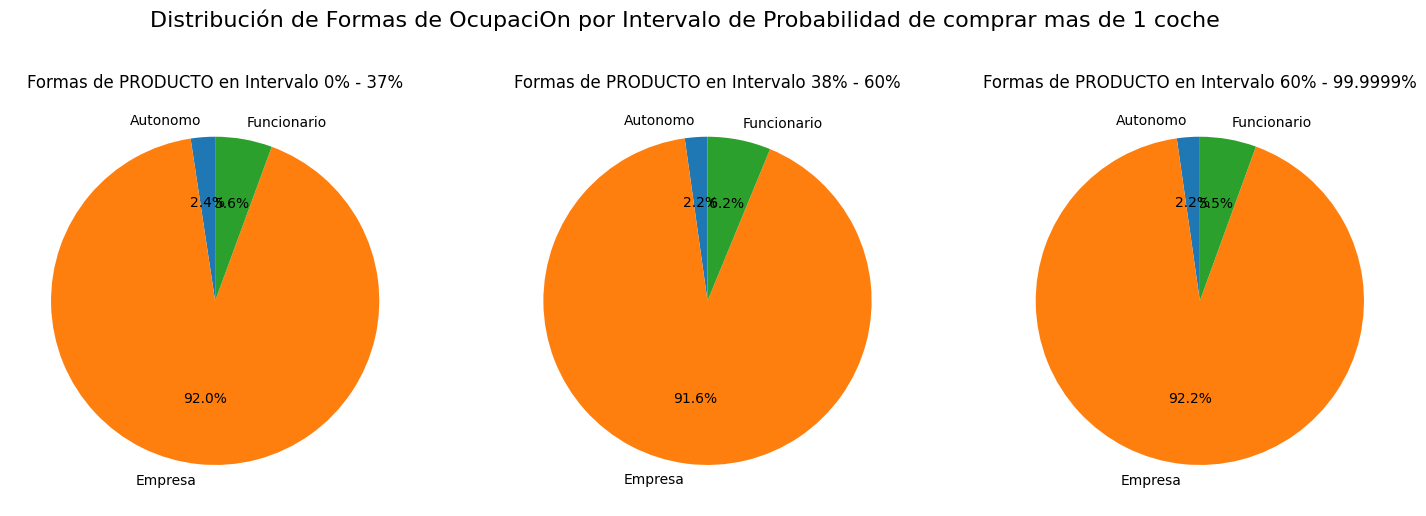

In [48]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'OcupaciOn']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['OcupaciOn'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de OcupaciOn en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de OcupaciOn por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


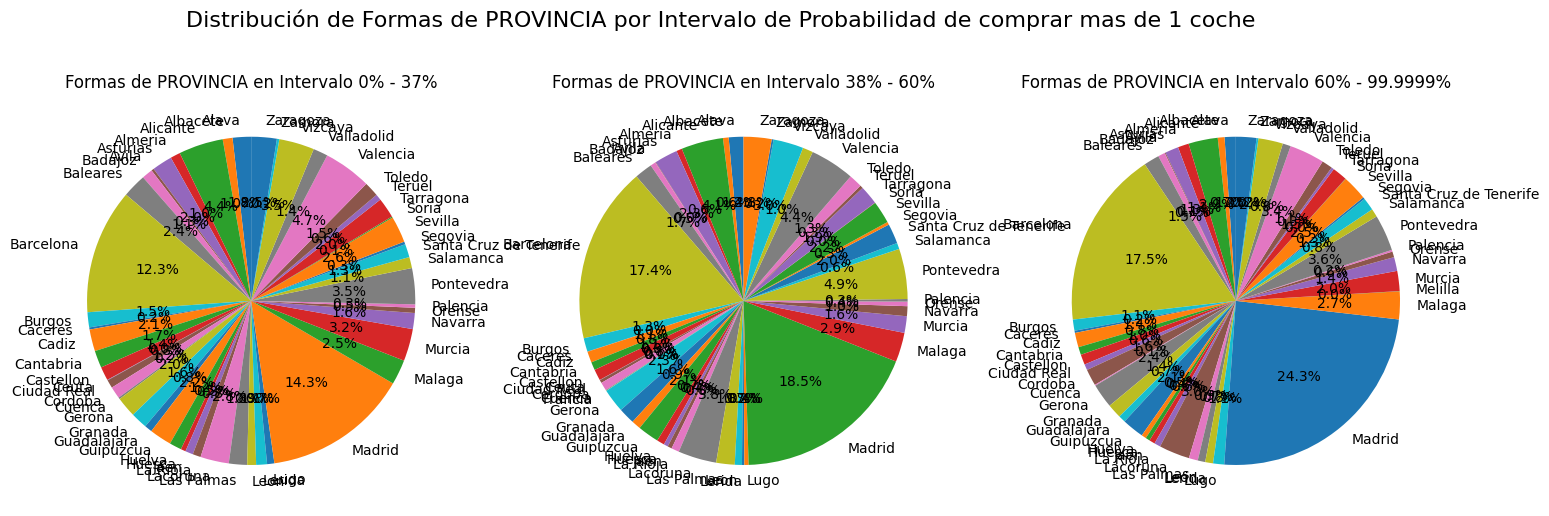

In [49]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'PROVINCIA']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['PROVINCIA'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de PROVINCIA en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de PROVINCIA por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


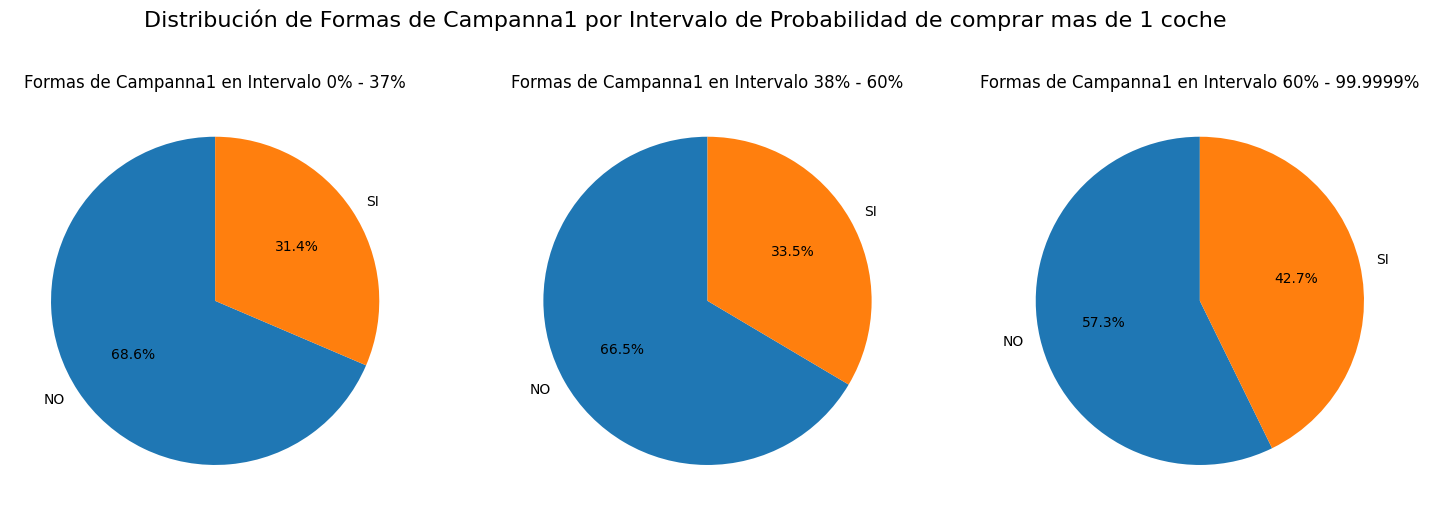

In [50]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Campanna1']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Campanna1'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Campanna1 en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Campanna1 por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()



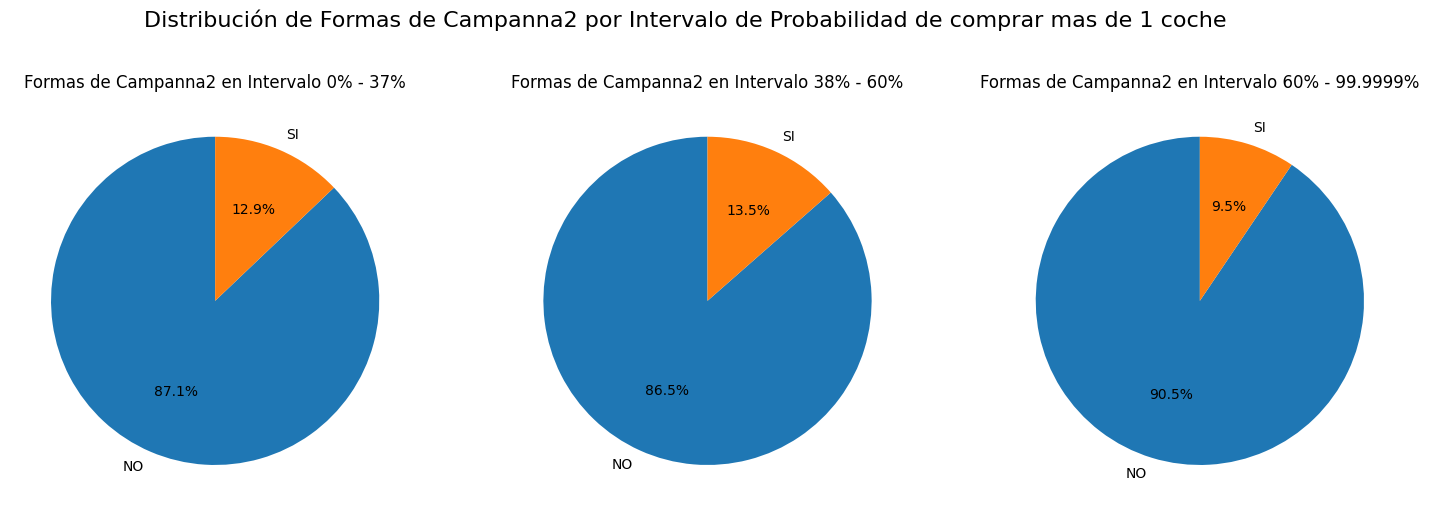

In [51]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Campanna2']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Campanna2'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Campanna2 en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Campanna2 por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


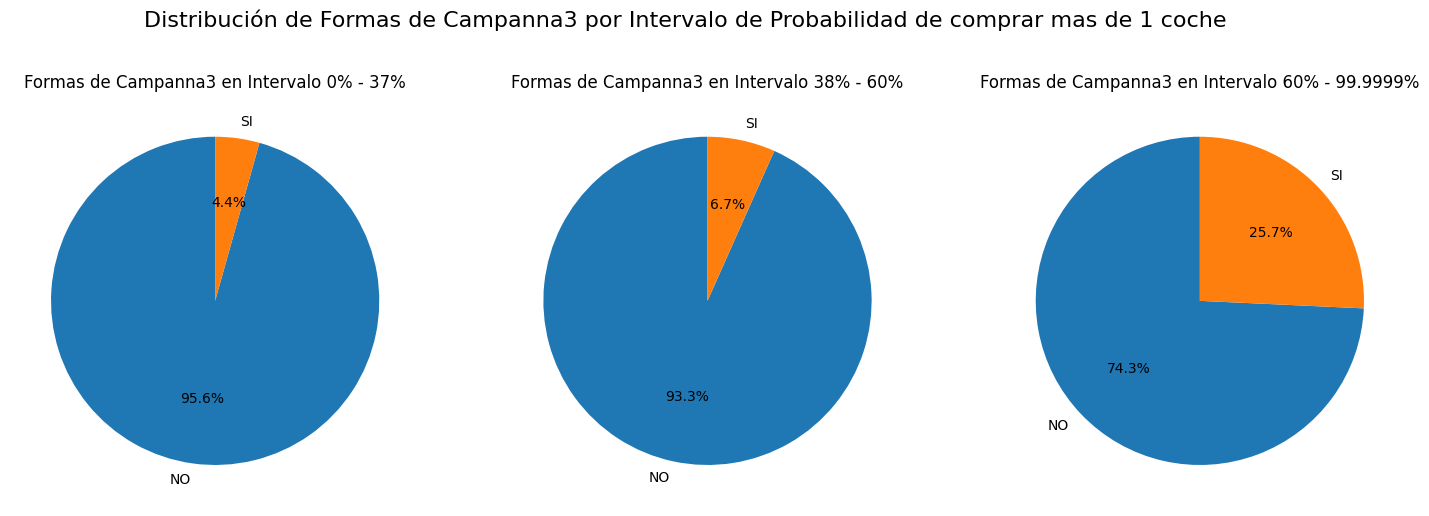

In [52]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Campanna3']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Campanna3'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Campanna3 en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Campanna3 por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


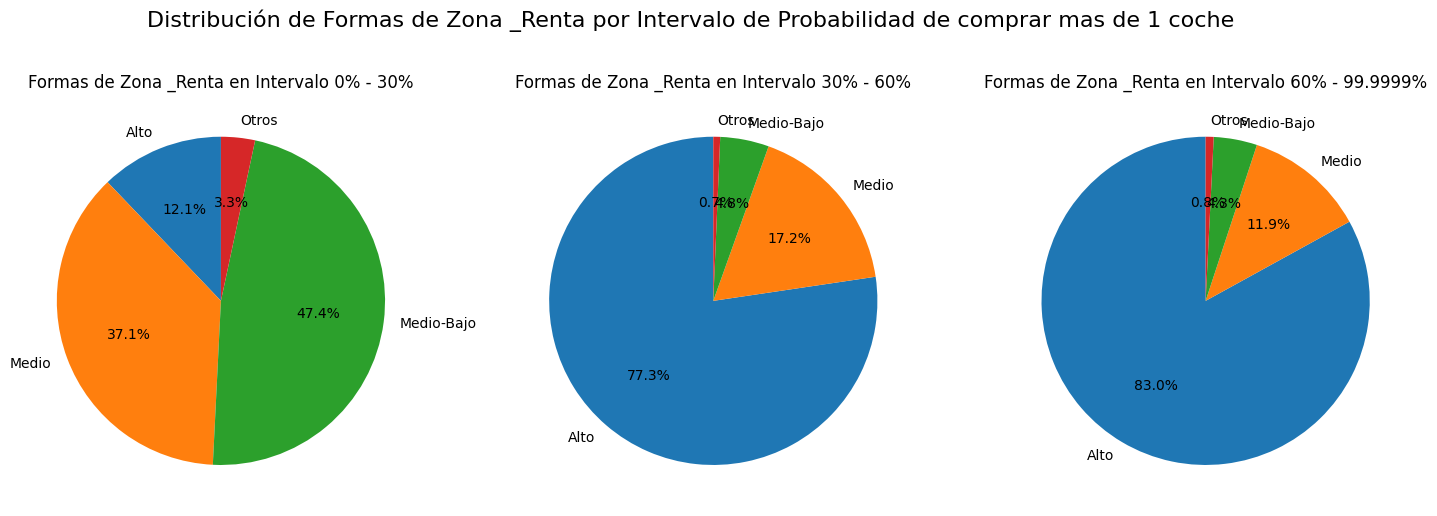

In [30]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Zona _Renta']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 30%', '30% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Zona _Renta'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Zona _Renta en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Zona _Renta por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


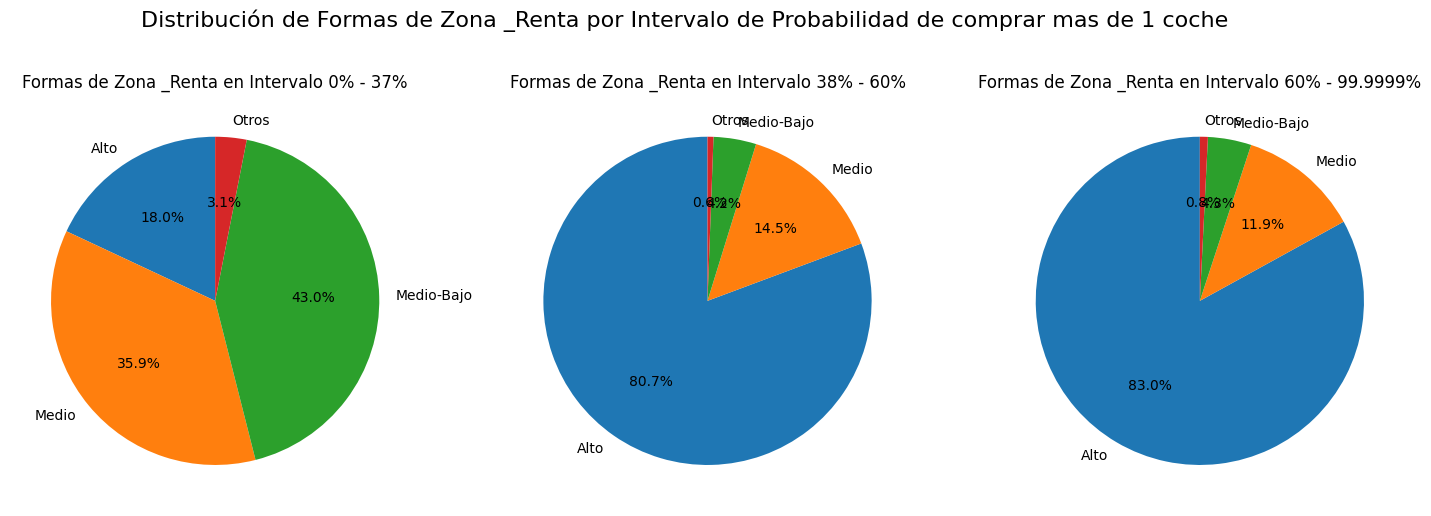

In [53]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Zona _Renta']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Zona _Renta'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Zona _Renta en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Zona _Renta por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


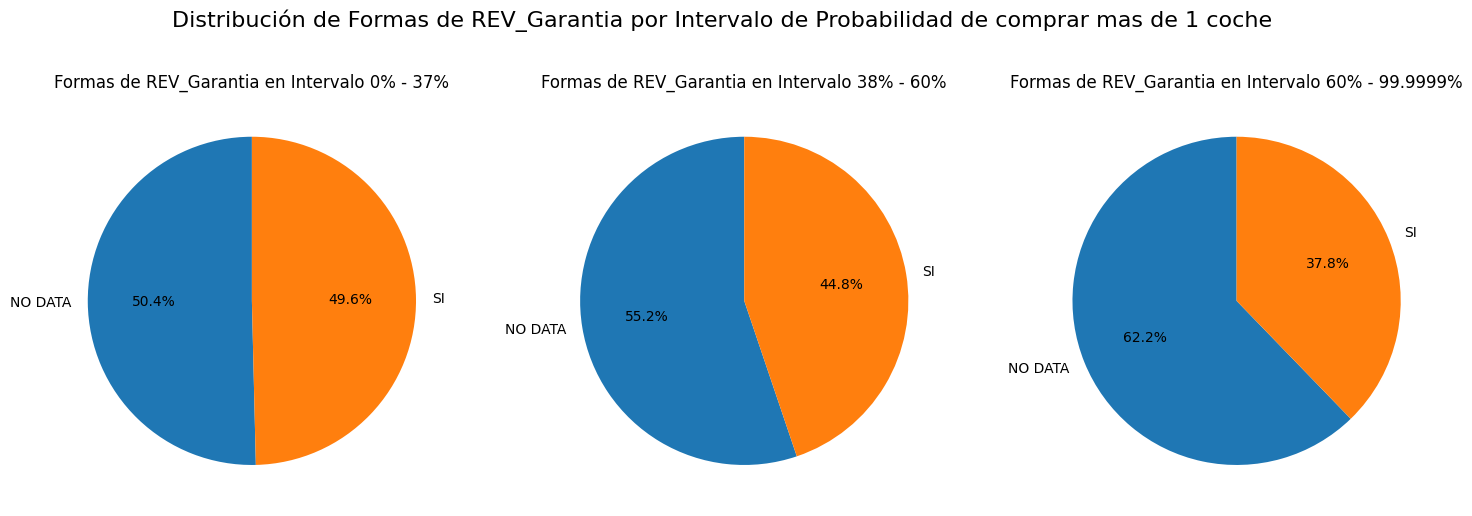

In [54]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'REV_Garantia']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['REV_Garantia'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de REV_Garantia en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de REV_Garantia por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


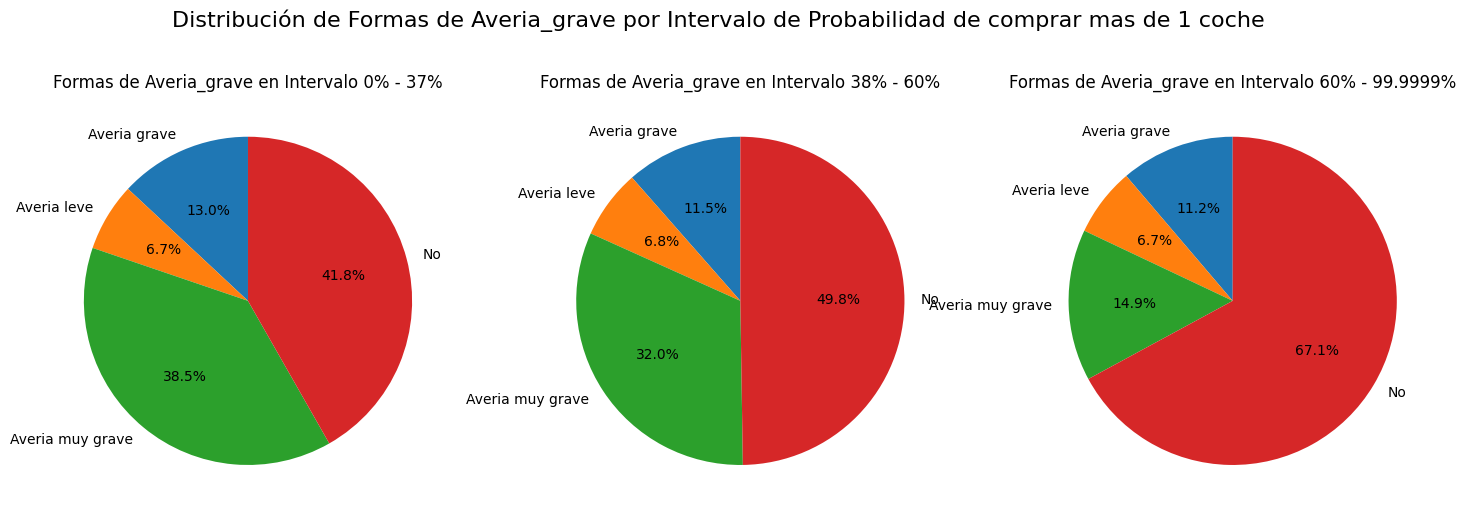

In [55]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Averia_grave']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Averia_grave'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Averia_grave en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Averia_grave por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


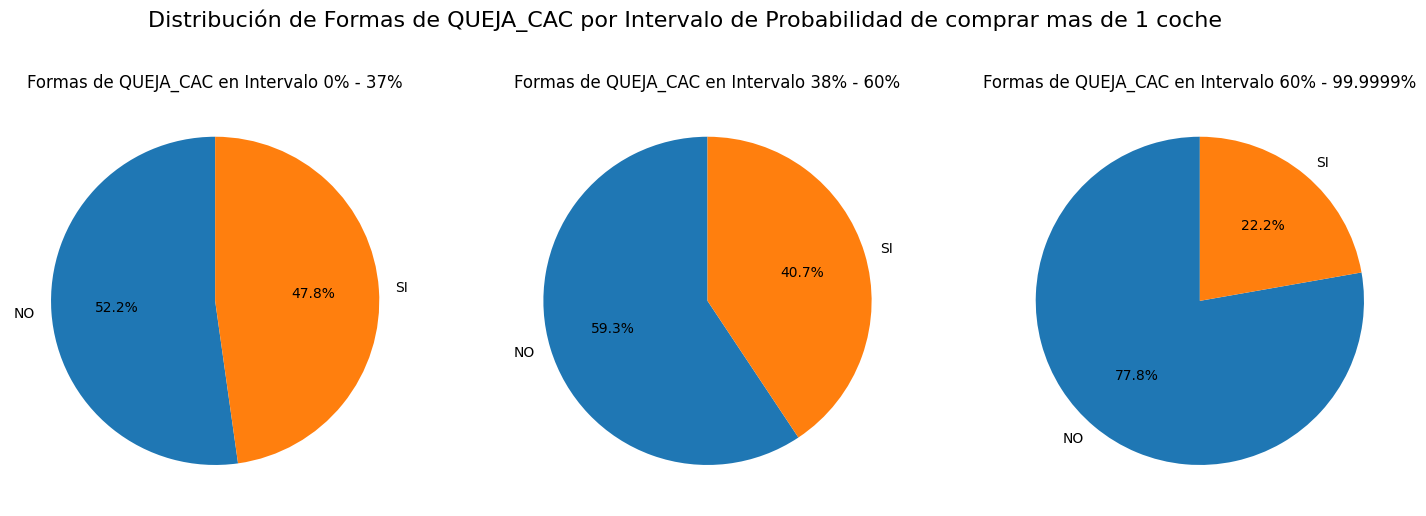

In [56]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'QUEJA_CAC']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['QUEJA_CAC'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de QUEJA_CAC en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de QUEJA_CAC por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


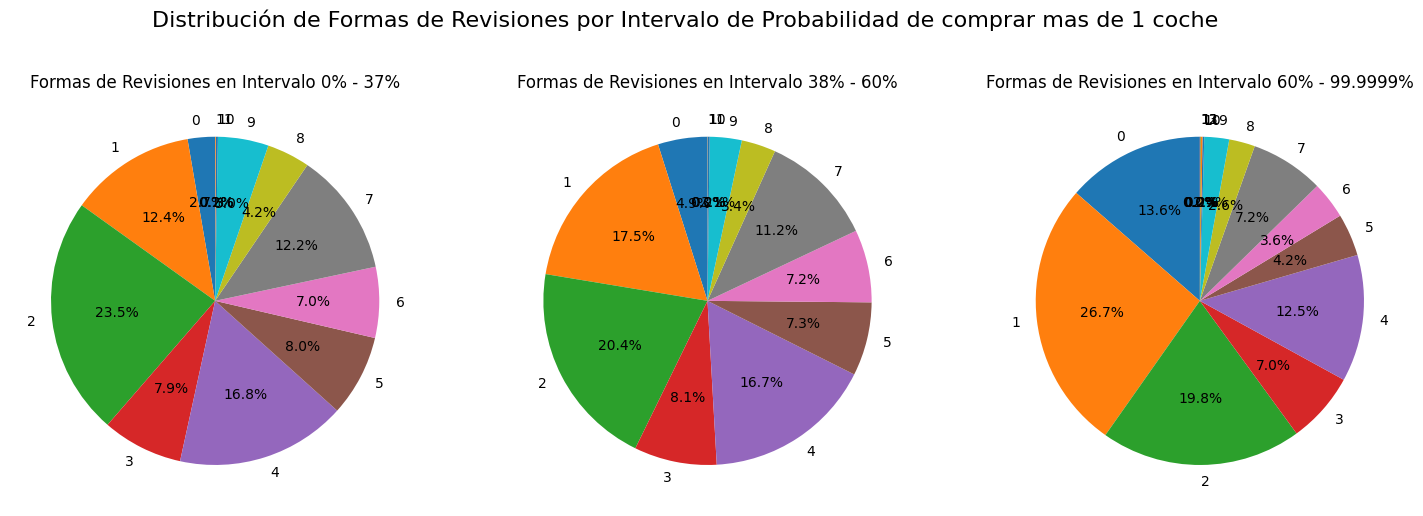

In [57]:
# 3. Calcular el porcentaje de formas de pago en cada intervalo
formas_pago_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Revisiones']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
formas_pago_por_intervalo = formas_pago_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
formas_pago_por_intervalo['percentage'] = (formas_pago_por_intervalo['counts'] / formas_pago_por_intervalo['total']) * 100

# 4. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 5. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = formas_pago_por_intervalo[formas_pago_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Revisiones'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Formas de Revisiones en Intervalo {intervalo}')

plt.suptitle('Distribución de Formas de Revisiones por Intervalo de Probabilidad de comprar mas de 1 coche', fontsize=16)
plt.show()


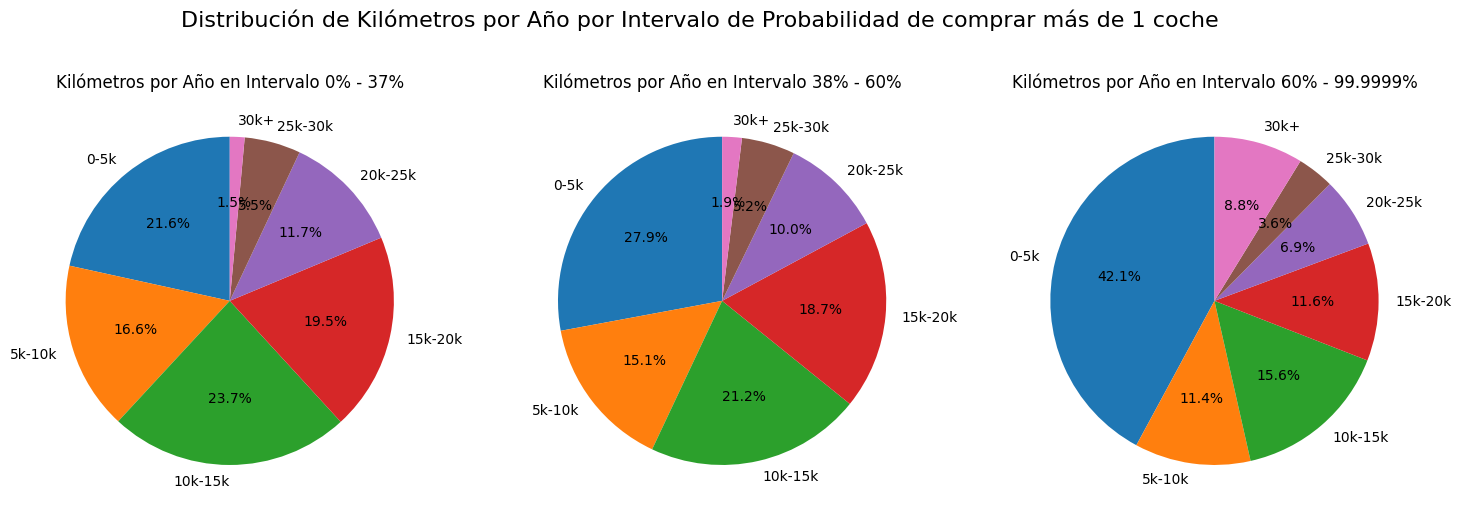

In [31]:
# 3. Crear intervalos para la columna 'KM_año' en miles de kilómetros
km_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]
km_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k','30k+']
df['KM_Intervalo'] = pd.cut(df['km_anno'], bins=km_bins, labels=km_labels, right=False)

# 4. Calcular el porcentaje de KM_Intervalo en cada intervalo de probabilidad
km_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'KM_Intervalo']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
km_por_intervalo = km_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
km_por_intervalo['percentage'] = (km_por_intervalo['counts'] / km_por_intervalo['total']) * 100

# 5. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 6. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = km_por_intervalo[km_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['KM_Intervalo'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Kilómetros por Año en Intervalo {intervalo}')

plt.suptitle('Distribución de Kilómetros por Año por Intervalo de Probabilidad de comprar más de 1 coche', fontsize=16)
plt.show()

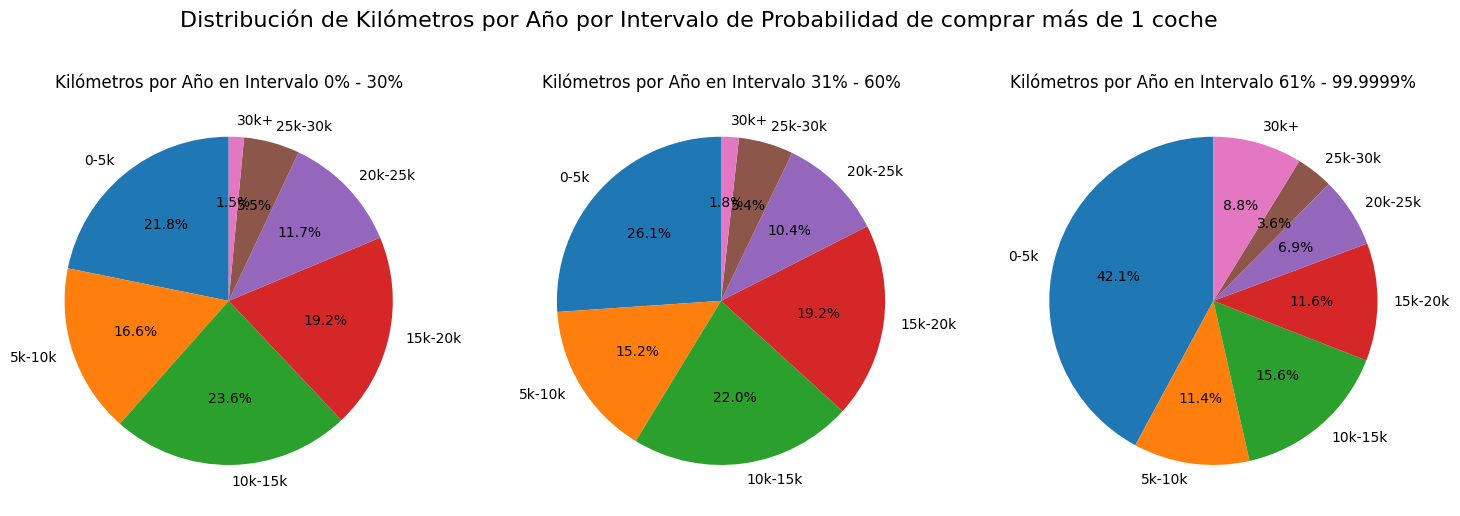

In [29]:
# 3. Crear intervalos para la columna 'KM_año' en miles de kilómetros
km_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]
km_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k','30k+']
df['KM_Intervalo'] = pd.cut(df['km_anno'], bins=km_bins, labels=km_labels, right=False)

# 4. Calcular el porcentaje de KM_Intervalo en cada intervalo de probabilidad
km_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'KM_Intervalo']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
km_por_intervalo = km_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
km_por_intervalo['percentage'] = (km_por_intervalo['counts'] / km_por_intervalo['total']) * 100

# 5. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 30%', '31% - 60%', '61% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 6. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = km_por_intervalo[km_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['KM_Intervalo'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Kilómetros por Año en Intervalo {intervalo}')

plt.suptitle('Distribución de Kilómetros por Año por Intervalo de Probabilidad de comprar más de 1 coche', fontsize=16)
plt.show()

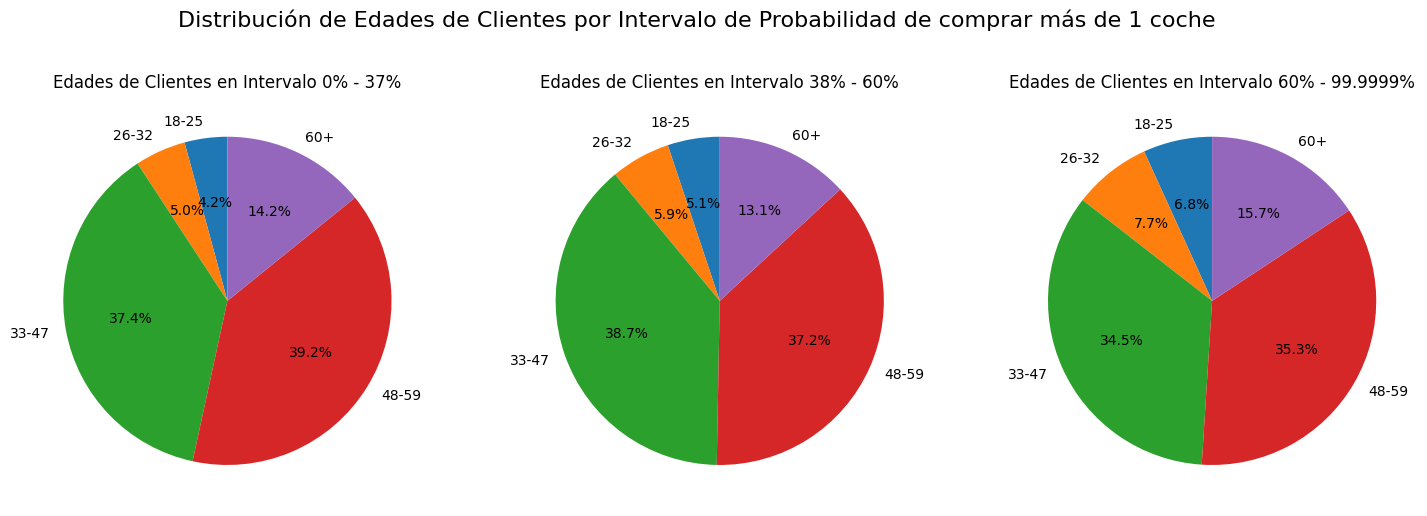

In [36]:
# 3. Crear intervalos para la columna 'Edad Cliente' en intervalos de 10 años
edad_bins = [18, 26, 33, 48, 60, float('inf')]
edad_labels = ['18-25', '26-32', '33-47', '48-59','60+']
df['Edad_Intervalo'] = pd.cut(df['Edad Cliente'], bins=edad_bins, labels=edad_labels, right=False)

# 4. Calcular el porcentaje de 'Edad_Intervalo' en cada intervalo de probabilidad
edad_por_intervalo = df.groupby(['Intervalo_Probabilidad', 'Edad_Intervalo']).size().reset_index(name='counts')
total_por_intervalo = df.groupby('Intervalo_Probabilidad').size().reset_index(name='total')
edad_por_intervalo = edad_por_intervalo.merge(total_por_intervalo, on='Intervalo_Probabilidad')
edad_por_intervalo['percentage'] = (edad_por_intervalo['counts'] / edad_por_intervalo['total']) * 100

# 5. Crear un diccionario para los datos de cada intervalo
intervalos = ['0% - 37%', '38% - 60%', '60% - 99.9999%']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 6. Graficar los 3 gráficos circulares
for i, intervalo in enumerate(intervalos):
    data_intervalo = edad_por_intervalo[edad_por_intervalo['Intervalo_Probabilidad'] == intervalo]
    axs[i].pie(data_intervalo['percentage'], labels=data_intervalo['Edad_Intervalo'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Edades de Clientes en Intervalo {intervalo}')

plt.suptitle('Distribución de Edades de Clientes por Intervalo de Probabilidad de comprar más de 1 coche', fontsize=16)
plt.show()